# Environment setting

In [1]:
! rm -rf gct634-2022/
! git clone https://github.com/jinu99/gct634-2022.git

Cloning into 'gct634-2022'...
remote: Enumerating objects: 145, done.
remote: Counting objects: 100% (98/98), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 145 (delta 46), reused 74 (delta 25), pack-reused 47
Receiving objects: 100% (145/145), 42.78 MiB | 38.56 MiB/s, done.
Resolving deltas: 100% (54/54), done.


In [2]:
%cd gct634-2022/hw3

/content/gct634-2022/hw3


In [3]:
! gdown --id 1wvN_ZWDiss1YCpC7GAPBMMlyrFYOB6NZ

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1wvN_ZWDiss1YCpC7GAPBMMlyrFYOB6NZ
To: /content/gct634-2022/hw3/maestro_small.zip
100% 1.14G/1.14G [00:30<00:00, 36.8MB/s]


In [4]:
! unzip -q maestro_small.zip

In [5]:
! ls data

2004  2006  2008  2009	2011  2013  2014  2015	2017  2018  data.json


In [6]:
import torch
print(torch.__version__)

1.12.1+cu113


If torch version == 1.6.x, install torchaudio==0.6

In [7]:
! pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 831.4 MB 6.0 kB/s 
     |████████████████████████████████| 87 kB 8.5 MB/s 
     |████████████████████████████████| 5.6 MB 52.9 MB/s 
     |████████████████████████████████| 4.2 MB 59.3 MB/s 
     |████████████████████████████████| 3.7 MB 62.6 MB/s 
     |████████████████████████████████| 3.7 MB 52.4 MB/s 
     |████████████████████████████████| 2.9 MB 67.1 MB/s 
     |████████████████████████████████| 2.9 MB 58.1 MB/s 
     |████████████████████████████████| 2.9 MB 63.7 MB/s 
     |████████████████████████████████| 2.9 MB 74.6 MB/s 
     |████████████████████████████████| 1.9 MB 55.4 MB/s 
     |████████████████████████████████| 51 kB 8.2 MB/s 
  Created wheel for mir-eval: filename=mir_eval-0.6-py3-none-any.whl size=96513 sha256=fbf4b21451d1fc418eb9bf46dc3765118e0febe5d165cf6375aa0433a73ace2a
  Stored in directory: /root/.cache/pip/wheels/08/28/2d/

You may also need fluidsynth to play the transcription.

In [8]:
! apt install fluidsynth; pip install pyFluidSynth 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  fluid-soundfont-gm libfluidsynth1 libqt5x11extras5 qsynth
Suggested packages:
  fluid-soundfont-gs timidity jackd
The following NEW packages will be installed:
  fluid-soundfont-gm fluidsynth libfluidsynth1 libqt5x11extras5 qsynth
0 upgraded, 5 newly installed, 0 to remove and 5 not upgraded.
Need to get 120 MB of archives.
After this operation, 150 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fluid-soundfont-gm all 3.1-5.1 [119 MB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libfluidsynth1 amd64 1.1.9-1 [137 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fluidsynth amd64 1.1.9-1 [20.7 kB]
Get:4 http://archive.ubu

# Checkout dataset(same as notebooks.dataset.ipynb)

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

from dataset import MAESTRO_small
from constants import HOP_SIZE

In [10]:
example_dataset = MAESTRO_small(path='data', groups=['debug'], sequence_length=None, random_sample=True)

Loading 1 group(s) of MAESTRO_small at data


Loading group debug: 100%|██████████| 10/10 [00:06<00:00,  1.50it/s]


In [11]:
data = example_dataset[1]
print(f'data: {data}')
print(f'audio_shape: {data["audio"].shape}')
print(f'frame_roll_shape: {data["frame"].shape}')
print(f'onset_roll_shape: {data["onset"].shape}')

print(f'HOP_SIZE({HOP_SIZE}) x piano_roll length({data["frame"].shape[0]}): {HOP_SIZE*data["frame"].shape[0]}')

data: {'path': 'data/2004/MIDI-Unprocessed_SMF_12_01_2004_01-05_ORIG_MID--AUDIO_12_R1_2004_08_Track08_wav.flac', 'audio': tensor([-0.0002, -0.0002, -0.0001,  ...,  0.0149,  0.0022, -0.0390]), 'frame': tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]), 'onset': tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])}
audio_shape: torch.Size([5411840])
frame_roll_shape: torch.Size([10570, 88])
onset_roll_shape: torch.Size([10570, 88])
HOP_SIZE(512) x piano_roll length(10570): 5411840


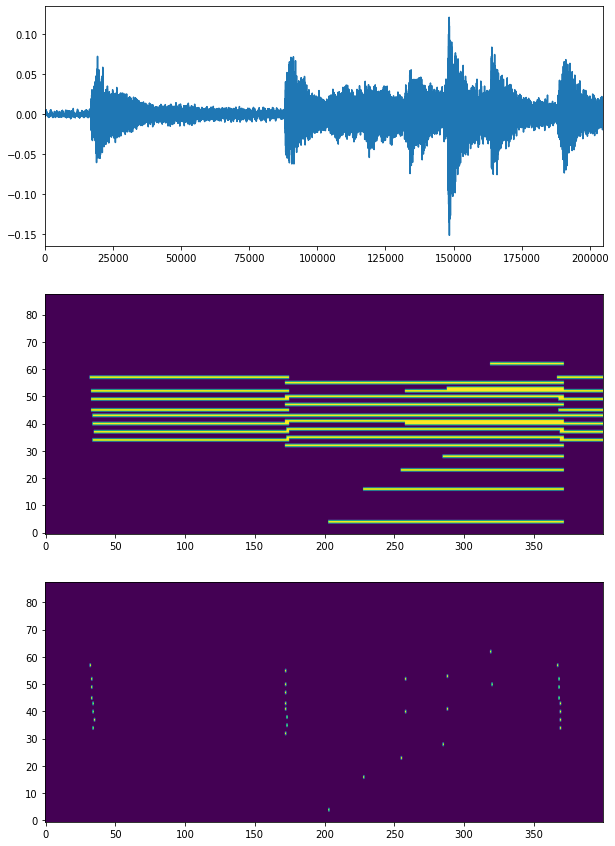

In [12]:
plt.figure(figsize=(10,15))
plt.subplot(311)
plt.plot(data['audio'].numpy()[:400*HOP_SIZE])
plt.autoscale(enable=True, axis='x', tight=True)
plt.subplot(312)
plt.imshow(data['frame'].numpy()[:400].T, aspect='auto', origin='bottom')
plt.subplot(313)
plt.imshow(data['onset'].numpy()[:400].T, aspect='auto', origin='bottom')

# Training

## Train 5k (Baseline)

In [13]:
#! python train.py -i=5000

You will have your model checkpoints & decoded samples in runs/exp_{datetime} folder

## Train RNN model

In [14]:
! python train.py --model_type=rnn

Loading 1 group(s) of MAESTRO_small at data
Loading group train: 100% 100/100 [00:41<00:00,  2.41it/s]
Loading 1 group(s) of MAESTRO_small at data
Loading group validation: 100% 20/20 [00:07<00:00,  2.83it/s]
 10% 999/10000 [01:43<15:54,  9.43it/s, loss: 1.867e-01]/usr/local/lib/python3.7/dist-packages/mir_eval/transcription.py:167: UserWarning: Estimated notes are empty.
  warnings.warn("Estimated notes are empty.")

metric/loss/frame_loss      : 0.1333
metric/loss/onset_loss      : 0.0137
metric/frame/frame_f1       : 0.1686
metric/frame/onset_f1       : 0.0000
metric/note/f1              : 0.0000
metric/note-with-offsets/f1 : 0.0000
 20% 1999/10000 [03:26<13:37,  9.79it/s, loss: 1.644e-01]
metric/loss/frame_loss      : 0.1031
metric/loss/onset_loss      : 0.0117
metric/frame/frame_f1       : 0.3465
metric/frame/onset_f1       : 0.0000
metric/note/f1              : 0.0000
metric/note-with-offsets/f1 : 0.0000
 30% 2999/10000 [05:09<11:41,  9.99it/s, loss: 1.396e-01]
metric/loss/frame_

## Train CRNN model

In [15]:
! python train.py --model_type=crnn

Loading 1 group(s) of MAESTRO_small at data
Loading group train:   4% 4/100 [00:01<00:27,  3.43it/s]Exception ignored in: <generator object tqdm.__iter__ at 0x7f48812a7450>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/tqdm/std.py", line 1210, in __iter__
    self.close()
  File "/usr/local/lib/python3.7/dist-packages/tqdm/std.py", line 1289, in close
    self._decr_instances(self)
  File "/usr/local/lib/python3.7/dist-packages/tqdm/std.py", line 595, in _decr_instances
    cls._instances.remove(instance)
KeyboardInterrupt: 
Traceback (most recent call last):
  File "train.py", line 181, in <module>
    train(**vars(parser.parse_args()))
  File "train.py", line 63, in train
    random_sample=True)
  File "/content/gct634-2022/hw3/dataset.py", line 47, in __init__
    self.data.append(self.load(*input_files))
  File "/content/gct634-2022/hw3/dataset.py", line 81, in load
    midi:PrettyMIDI = pretty_midi.PrettyMIDI(midi_path)
  File "/usr/local/lib/py

## Train ONF model

In [16]:
! python train.py --model_type=ONF --save_midi

Loading 1 group(s) of MAESTRO_small at data
Loading group train: 100% 100/100 [00:38<00:00,  2.59it/s]
Loading 1 group(s) of MAESTRO_small at data
Loading group validation: 100% 20/20 [00:06<00:00,  2.94it/s]
 10% 999/10000 [04:52<46:25,  3.23it/s, loss: 2.522e-01]/usr/local/lib/python3.7/dist-packages/mir_eval/transcription.py:167: UserWarning: Estimated notes are empty.
  warnings.warn("Estimated notes are empty.")

metric/loss/frame_loss      : 0.1499
metric/loss/onset_loss      : 0.0154
metric/frame/frame_f1       : 0.0000
metric/frame/onset_f1       : 0.0000
metric/note/f1              : 0.0000
metric/note-with-offsets/f1 : 0.0000
 20% 1999/10000 [09:44<40:34,  3.29it/s, loss: 1.888e-01]
metric/loss/frame_loss      : 0.1377
metric/loss/onset_loss      : 0.0152
metric/frame/frame_f1       : 0.0006
metric/frame/onset_f1       : 0.0000
metric/note/f1              : 0.0000
metric/note-with-offsets/f1 : 0.0000
 27% 2681/10000 [13:03<35:40,  3.42it/s, loss: 1.838e-01]
Traceback (most re

# Result Visualization

In [17]:
# TODO: pick random testcase and compare the answer and prediction

test_dataset = MAESTRO_small(path='data', groups=['test'], sequence_length=None, random_sample=True)

Loading 1 group(s) of MAESTRO_small at data


Loading group test:  36%|███▌      | 18/50 [00:06<00:11,  2.80it/s]


KeyboardInterrupt: ignored

## Original onset and frame

In [ ]:
data = test_dataset[1]
print(f'data: {data}')
print(f'audio_shape: {data["audio"].shape}')
print(f'frame_roll_shape: {data["frame"].shape}')
print(f'onset_roll_shape: {data["onset"].shape}')

print(f'HOP_SIZE({HOP_SIZE}) x piano_roll length({data["frame"].shape[0]}): {HOP_SIZE*data["frame"].shape[0]}')

In [ ]:
plt.figure(figsize=(10,15))
plt.subplot(311)
plt.plot(data['audio'].numpy()[:400*HOP_SIZE])
plt.autoscale(enable=True, axis='x', tight=True)
plt.subplot(312)
plt.imshow(data['frame'].numpy()[:400].T, aspect='auto', origin='bottom')
plt.subplot(313)
plt.imshow(data['onset'].numpy()[:400].T, aspect='auto', origin='bottom')

## Predicted Onset and Frame